In [1]:
import os, sys, time
import numpy as np
import torch
from object_memory import *
import matplotlib.pyplot as plt

Starting imports
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Imports completed in 23.658434629440308 seconds


In [2]:
import open3d as o3d
from PIL import Image

In [ ]:
maxn = 3316

for i in range(20,50):
    plt.figure()
    img = Image.open(f"/scratch/aneesh.chavan/8room/8-room-v1/1/rgb/{str(i)}.png")
    plt.imshow(img)

In [5]:
import re
import json
from tqdm import tqdm

with open("/scratch/aneesh.chavan/8room/8-room-v1/1/pose/1.txt") as f:
    k = re.sub("'","\"",f.read())
    j = json.loads(k)
    print(j)


[{'x': 3.75, 'y': 0.9009997844696045, 'z': 20.25}, {'x': 30.000003814697266, 'y': 0.10863005431502716, 'z': 0}]


In [6]:
def getAllPoses(root="/scratch/aneesh.chavan/8room/8-room-v1/1/pose", maxn=3316):
    poses = []
    for i in tqdm(range(1,maxn)):
        try:
            with open(f"{root}/{str(i)}.txt") as f:
                k = re.sub("'","\"",f.read())
                j = json.loads(k)
                poses.append([j[0]['x'], j[0]['y'], j[0]['z']])
        except:
            continue
    poses = np.array(poses)
    return poses

In [33]:
poses = getAllPoses()

100%|██████████| 3315/3315 [00:00<00:00, 25462.20it/s]


100%|██████████| 3315/3315 [00:00<00:00, 24998.64it/s]


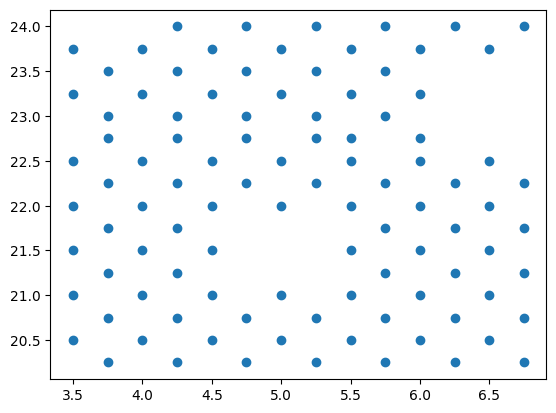

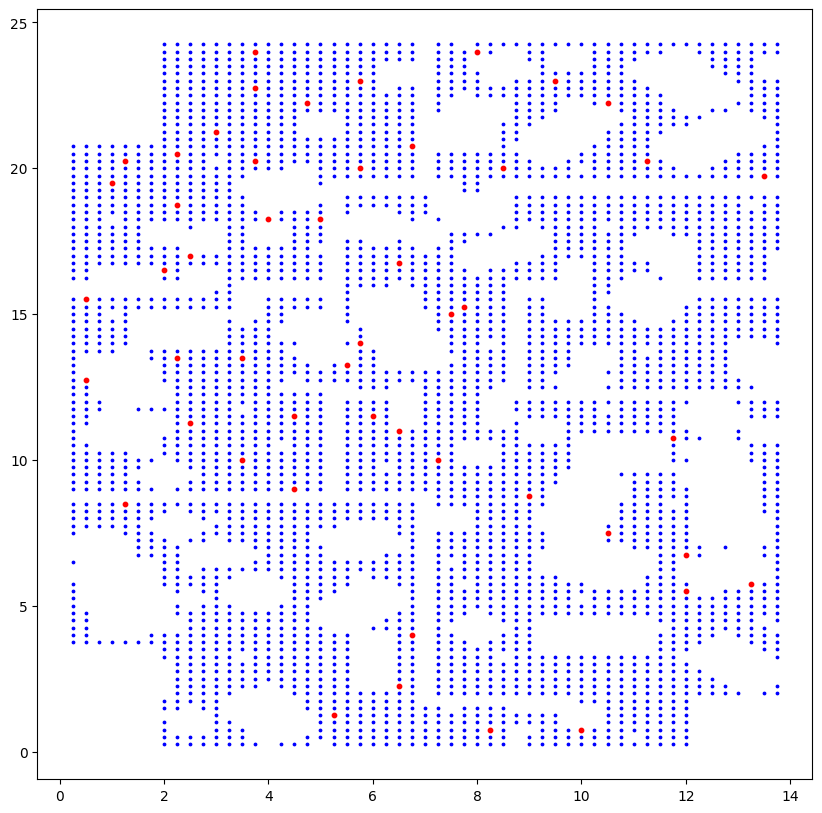

In [36]:
poses1 = getAllPoses()
p = poses[:1000:20]

k=200
plt.scatter(poses[:k,0], poses[:k,-1])

plt.figure(figsize=(10,10))
plt.scatter(poses[:,0], poses[:,-1], c='b', s=3)
plt.scatter(p[:,0], p[:,-1],c='r', s=10)

100%|██████████| 3315/3315 [00:00<00:00, 25019.11it/s]


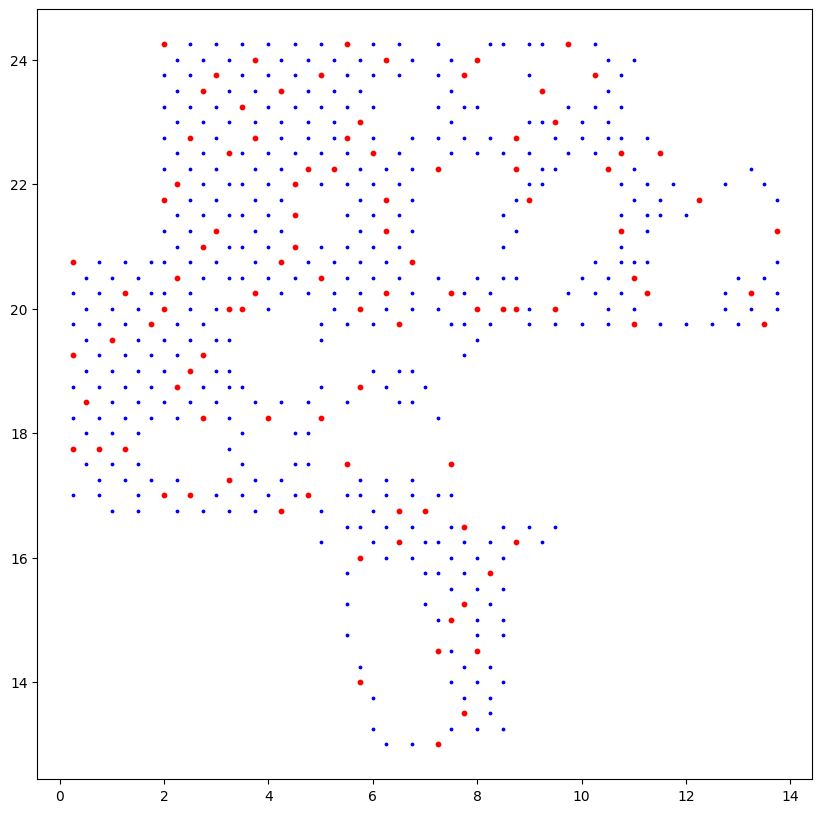

In [22]:
poses2 = getAllPoses("/scratch/aneesh.chavan/8room/8-room-v1/2/pose")
p = poses[::5]

p = p[0:100]
q = poses[5 * 00:100 * 5]

plt.figure(figsize=(10,10))
plt.scatter(q[:,0], q[:,-1], c='b', s=3)
plt.scatter(p[:,0], p[:,-1],c='r', s=10)

In [10]:
poses3 = getAllPoses("/scratch/aneesh.chavan/8room/8-room-v1/3/pose")
poses4 = getAllPoses("/scratch/aneesh.chavan/8room/8-room-v1/4/pose")
poses5 = getAllPoses("/scratch/aneesh.chavan/8room/8-room-v1/5/pose")
poses6 = getAllPoses("/scratch/aneesh.chavan/8room/8-room-v1/6/pose")


100%|██████████| 3315/3315 [00:00<00:00, 4836.03it/s]


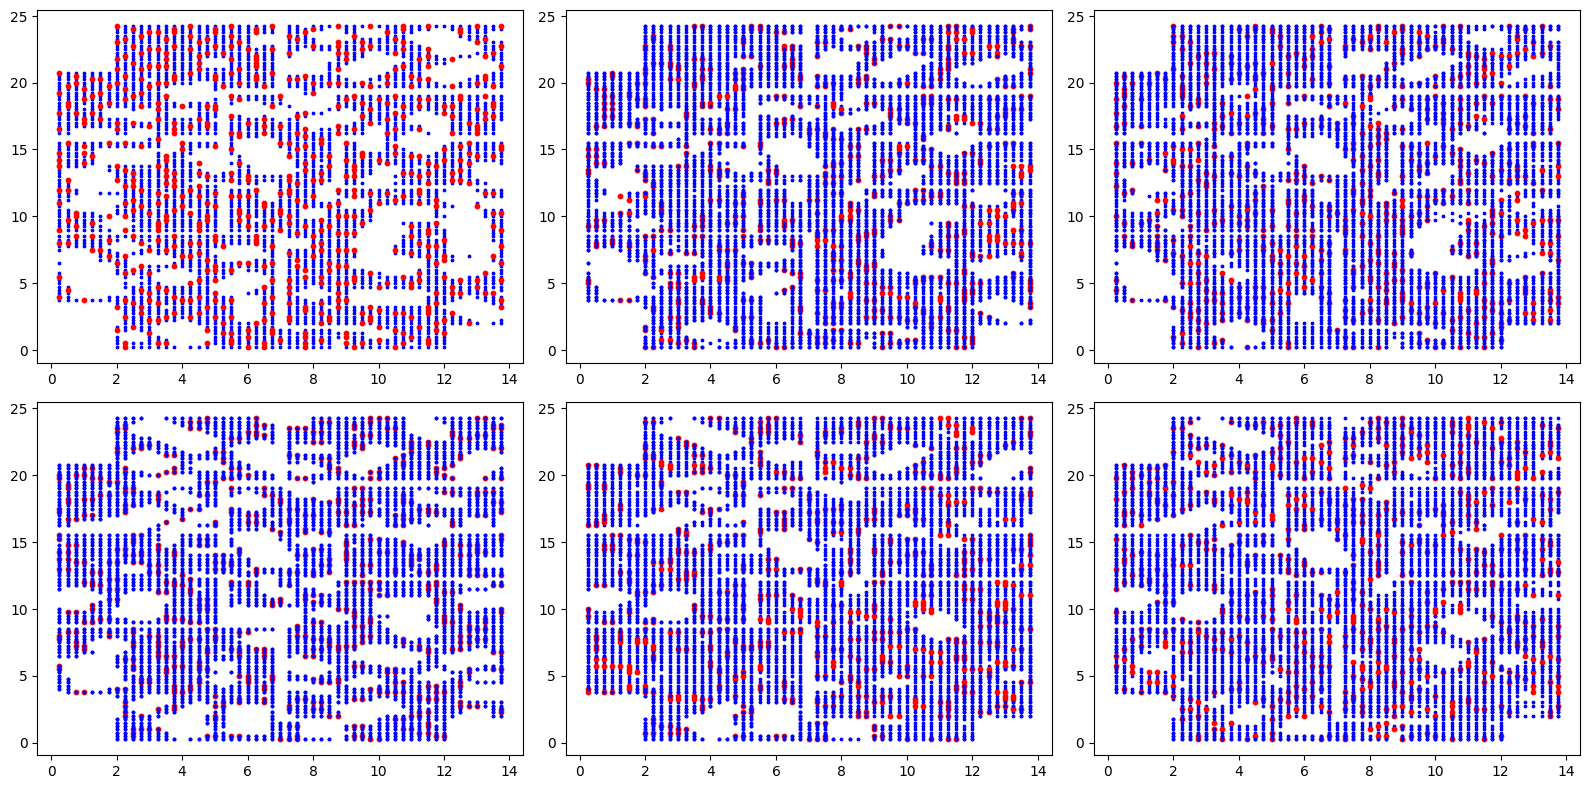

In [11]:
# poses2 = getAllPoses("/scratch/aneesh.chavan/8room/8-room-v1/2/pose")
p1 = poses1[::5]
p2 = poses2[::5]
p3 = poses3[::5]
p4 = poses4[::5]
p5 = poses5[::5]
p6 = poses6[::5]



fig, axs = plt.subplots(2, 3, figsize=(16, 8))

# Plot the first subplot
axs[0][0].scatter(poses1[:,0], poses1[:,-1], c='b', s=3)
axs[0][0].scatter(p1[:,0], p1[:,-1],c='r', s=10)

# Plot the second subplot
axs[0][1].scatter(poses2[:,0], poses2[:,-1], c='b', s=3)
axs[0][1].scatter(p2[:,0], p2[:,-1],c='r', s=10)

axs[0][2].scatter(poses3[:,0], poses3[:,-1], c='b', s=3)
axs[0][2].scatter(p3[:,0], p3[:,-1],c='r', s=10)

axs[1][0].scatter(poses4[:,0], poses4[:,-1], c='b', s=3)
axs[1][0].scatter(p4[:,0], p4[:,-1],c='r', s=10)

axs[1][1].scatter(poses5[:,0], poses5[:,-1], c='b', s=3)
axs[1][1].scatter(p5[:,0], p5[:,-1],c='r', s=10)

axs[1][2].scatter(poses6[:,0], poses6[:,-1], c='b', s=3)
axs[1][2].scatter(p6[:,0], p6[:,-1],c='r', s=10)

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# cover shit
axs[0][1].scatter(poses1[:,0], poses1[:,-1], c='b', s=3)
axs[0][2].scatter(poses1[:,0], poses1[:,-1], c='b', s=3)
axs[1][0].scatter(poses4[:,0], poses4[:,-1], c='b', s=3)
axs[1][1].scatter(poses4[:,0], poses4[:,-1], c='b', s=3)
axs[1][2].scatter(poses4[:,0], poses4[:,-1], c='b', s=3)

# Show the plots
plt.show()